## Import Libraries

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [4]:
np.random.seed(42)

### Tạo dữ liệu đầu vào: số năm kinh nghiệm (feature)

In [5]:
X = np.random.uniform(0, 10, 100).reshape(-1, 1)

### Tạo nhãn: thu nhập (target), đơn vị triệu VND
### Công thức: income = 5 * years + noise

In [6]:
noise = np.random.normal(0, 2, size = X.shape[0])   # Nhiễu ngẫu nhiên
y = 5 * X.flatten() + 20 + noise    # lương cơ bản 20 triệu + 5 triệu mỗi năm kinh nghiệm

In [7]:
y.shape

(100,)

### Split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42: Đảm bảo việc chia dữ liệu là ngẫu nhiên nhưng có thể lặp lại (tái tạo được).

### Training

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict

In [10]:
y_pred = model.predict(X_test)


### Evaluation

#### MSE: Sai số bình phương trung bình là một chỉ số đánh giá phổ biến và chính xác để đo hiệu quả của các mô hình hồi quy (regression), bao gồm cả Linear Regression.

In [11]:
mse = mean_squared_error(y_test, y_pred)

In [12]:
print(f"Mean squared error: {mse}")

Mean squared error: 2.6147980548680207


In [13]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolution error: {mae}")

Mean absolution error: 1.1826851558379592


In [15]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")

Root mean squared error: 1.6170337210052301


### Hiển thị biểu đồ

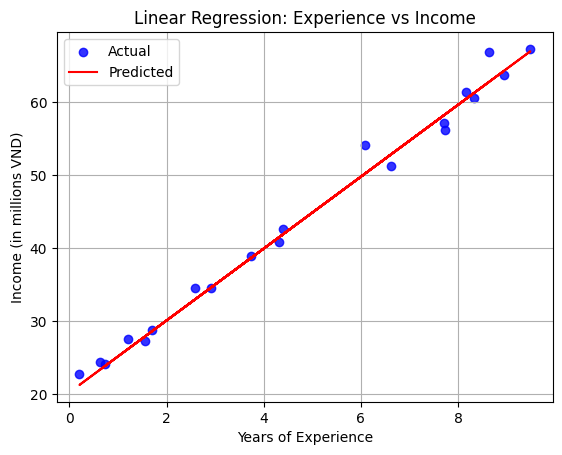

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.8)
plt.plot(X_test, y_pred, color='red', label='Predicted')

plt.xlabel('Years of Experience')
plt.ylabel('Income (in millions VND)')
plt.title('Linear Regression: Experience vs Income')
plt.legend()    # hiển thị chú thích (legend)
plt.grid(True)  # hiển thị lưới (grid lines)
plt.show()

| Tên thuật toán                  | Mở rộng thêm từ Linear Regression                |
| ------------------------------- | ------------------------------------------------ |
| **Polynomial Regression**       | Hồi quy đa thức (bổ sung thêm đặc trưng bậc cao) |
| **Ridge Regression**            | Thêm regularization L2 để tránh overfitting      |
| **Lasso Regression**            | Thêm regularization L1, đồng thời chọn đặc trưng |
| **ElasticNet**                  | Kết hợp Ridge + Lasso                            |
| **Decision Tree Regressor**     | Phi tuyến tính, dễ hiểu                          |
| **Random Forest Regressor**     | Ensemble từ nhiều cây, mạnh mẽ hơn               |
| **Gradient Boosting Regressor** | Boosting cho độ chính xác cao hơn                |
| **XGBoost / LightGBM**          | Boosting nâng cao, rất phổ biến hiện nay         |


## Elastic Net

$$
\text{Loss} = \frac{1}{2n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \left[ \alpha \sum_{j=1}^{p} |\beta_j| + \frac{(1 - \alpha)}{2} \sum_{j=1}^{p} \beta_j^2 \right]
$$


In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [23]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 3

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
model = ElasticNet()
model.fit(X_train, y_train)

ElasticNet()

In [27]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")
a_r2_score = r2_score(y_test, y_pred)
print("R2 Score: {}".format(a_r2_score))

Mean squared error: 11.076169557261814
R2 Score: 0.8967857918564384


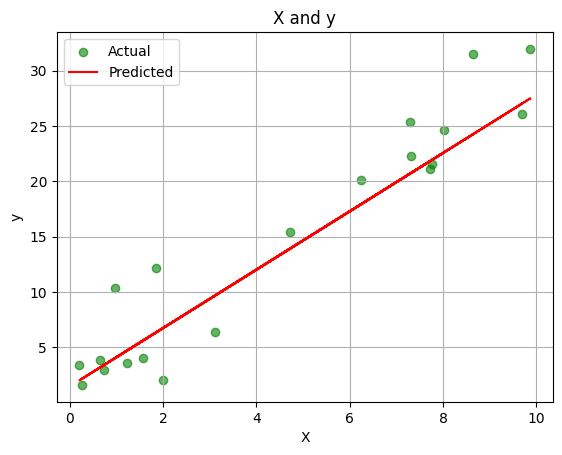

In [32]:
plt.scatter(X_test, y_test, color='green', label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('X and y')
plt.legend()
plt.grid(True)
plt.show()